In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
liver=pd.read_csv("indian_liver_patient_dataset.csv")

In [3]:
liver.head()

,age,gender,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
liver.describe()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.00000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,-685.16578,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,8261.85600,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,-100000.00000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.70000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.92000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.10000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.80000,2.000000


In [5]:
gender=liver["gender"]


In [6]:
liver.shape

(583, 11)

In [7]:
liver.info()
target=liver["class"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age        583 non-null int64
gender     583 non-null object
TB         583 non-null float64
DB         583 non-null float64
alkphos    583 non-null int64
sgpt       583 non-null int64
sgot       583 non-null int64
TP         583 non-null float64
ALB        583 non-null float64
A_G        583 non-null float64
class      583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
display(liver.isna().sum())
display(liver["class"].value_counts())

age        0
gender     0
TB         0
DB         0
alkphos    0
sgpt       0
sgot       0
TP         0
ALB        0
A_G        0
class      0
dtype: int64

1    416
2    167
Name: class, dtype: int64

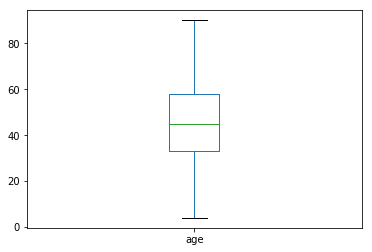

In [9]:
liver["age"].plot(kind="box")

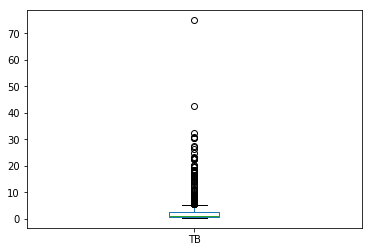

In [10]:
liver["TB"].plot(kind="box")

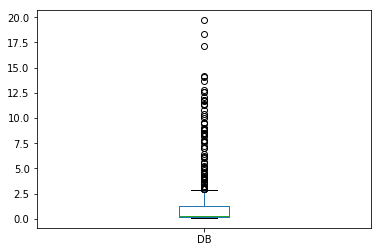

In [11]:
liver["DB"].plot(kind="box")

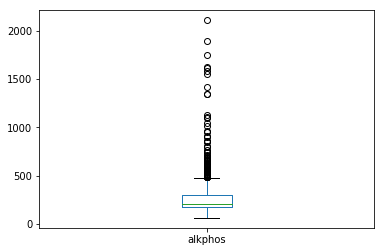

In [12]:
liver["alkphos"].plot(kind="box")

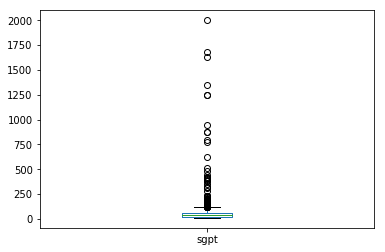

In [13]:
liver["sgpt"].plot(kind="box")

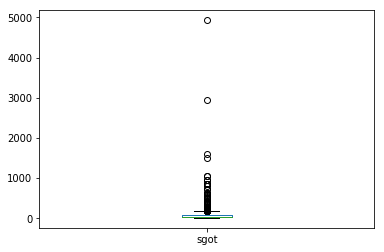

In [14]:
liver["sgot"].plot(kind="box")

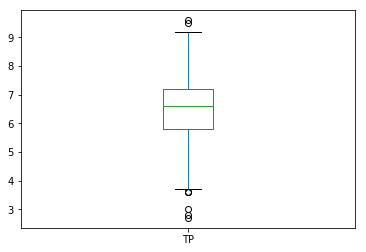

In [15]:
liver["TP"].plot(kind="box")

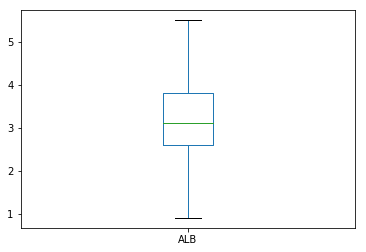

In [16]:
liver["ALB"].plot(kind="box")

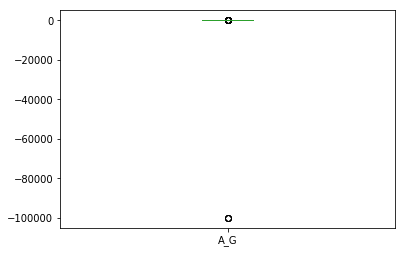

In [17]:
liver["A_G"].plot(kind="box")

In [18]:
# since if we are removing the the outliers there is no correlation between the feature and class

In [19]:

liver.drop("gender",axis=1,inplace=True)
liver

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [20]:
scaler = MinMaxScaler()

norm_liver= pd.DataFrame(scaler.fit_transform(liver))

In [21]:
# normalized the data

In [22]:
norm_liver.columns=["age","TB","DB","alkphos","sgpt","sgot","TP","ALB","A_G","class"]
norm_liver

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.999981,0.0
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.999979,0.0
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.999981,0.0
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.999982,0.0
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.999976,0.0
5,0.488372,0.018767,0.030612,0.070835,0.004523,0.000813,0.710145,0.760870,0.999985,0.0
6,0.255814,0.006702,0.005102,0.044455,0.003015,0.000407,0.623188,0.565217,0.999982,0.0
7,0.290698,0.006702,0.010204,0.067904,0.002010,0.000203,0.579710,0.586957,0.999983,0.0
8,0.151163,0.006702,0.010204,0.067904,0.006030,0.001830,0.681159,0.695652,0.999984,1.0
9,0.593023,0.004021,0.005102,0.110894,0.021608,0.009758,0.594203,0.543478,0.999982,0.0


In [23]:
# encoding the gender and then appending it with norm_liver dataframe

In [24]:
le=preprocessing.LabelEncoder()
gender=le.fit_transform(gender)

In [25]:
norm_liver["gender"]=gender
norm_liver.head()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class,gender
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.999981,0.0,0
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.999979,0.0,1
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.999981,0.0,1
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.999982,0.0,1
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.999976,0.0,1


In [26]:
norm_liver.corr()

,age,TB,DB,alkphos,sgpt,sgot,TP,ALB,A_G,class,gender
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,0.026948,-0.137351,0.056560
TB,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,0.032129,-0.220208,0.089291
DB,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,0.034385,-0.246046,0.100436
alkphos,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,0.039139,-0.184866,-0.027496
sgpt,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,0.027201,-0.163416,0.082332
sgot,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,0.020991,-0.151934,0.080336
TP,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,-0.016607,0.035008,-0.089121
ALB,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,-0.050497,0.161388,-0.093799
A_G,0.026948,0.032129,0.034385,0.039139,0.027201,0.020991,-0.016607,-0.050497,1.000000,-0.039254,0.049655
class,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,-0.039254,1.000000,-0.082416


In [27]:
norm_liver.var()

age        0.035440
TB         0.006928
DB         0.020532
alkphos    0.014085
sgpt       0.008422
sgot       0.003450
TP         0.024747
ALB        0.029908
A_G        0.006825
class      0.204747
gender     0.184559
dtype: float64

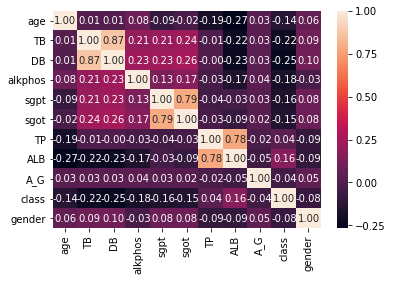

In [28]:
sb.heatmap(norm_liver.corr(),annot=True,fmt=".2f")

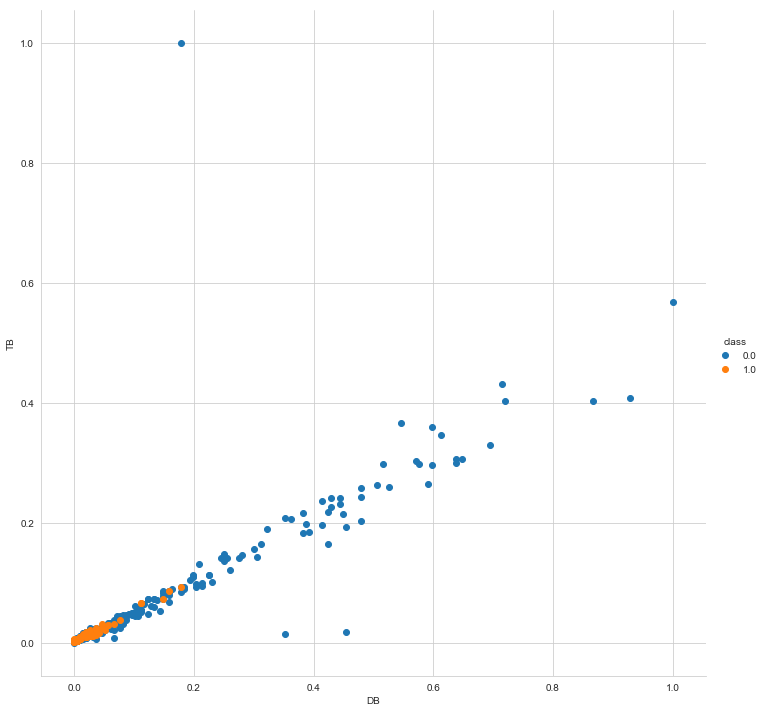

In [29]:
sb.set_style("whitegrid")
sb.FacetGrid(norm_liver,hue="class",size=10).map(plt.scatter,"DB","TB").add_legend()
plt.show() 

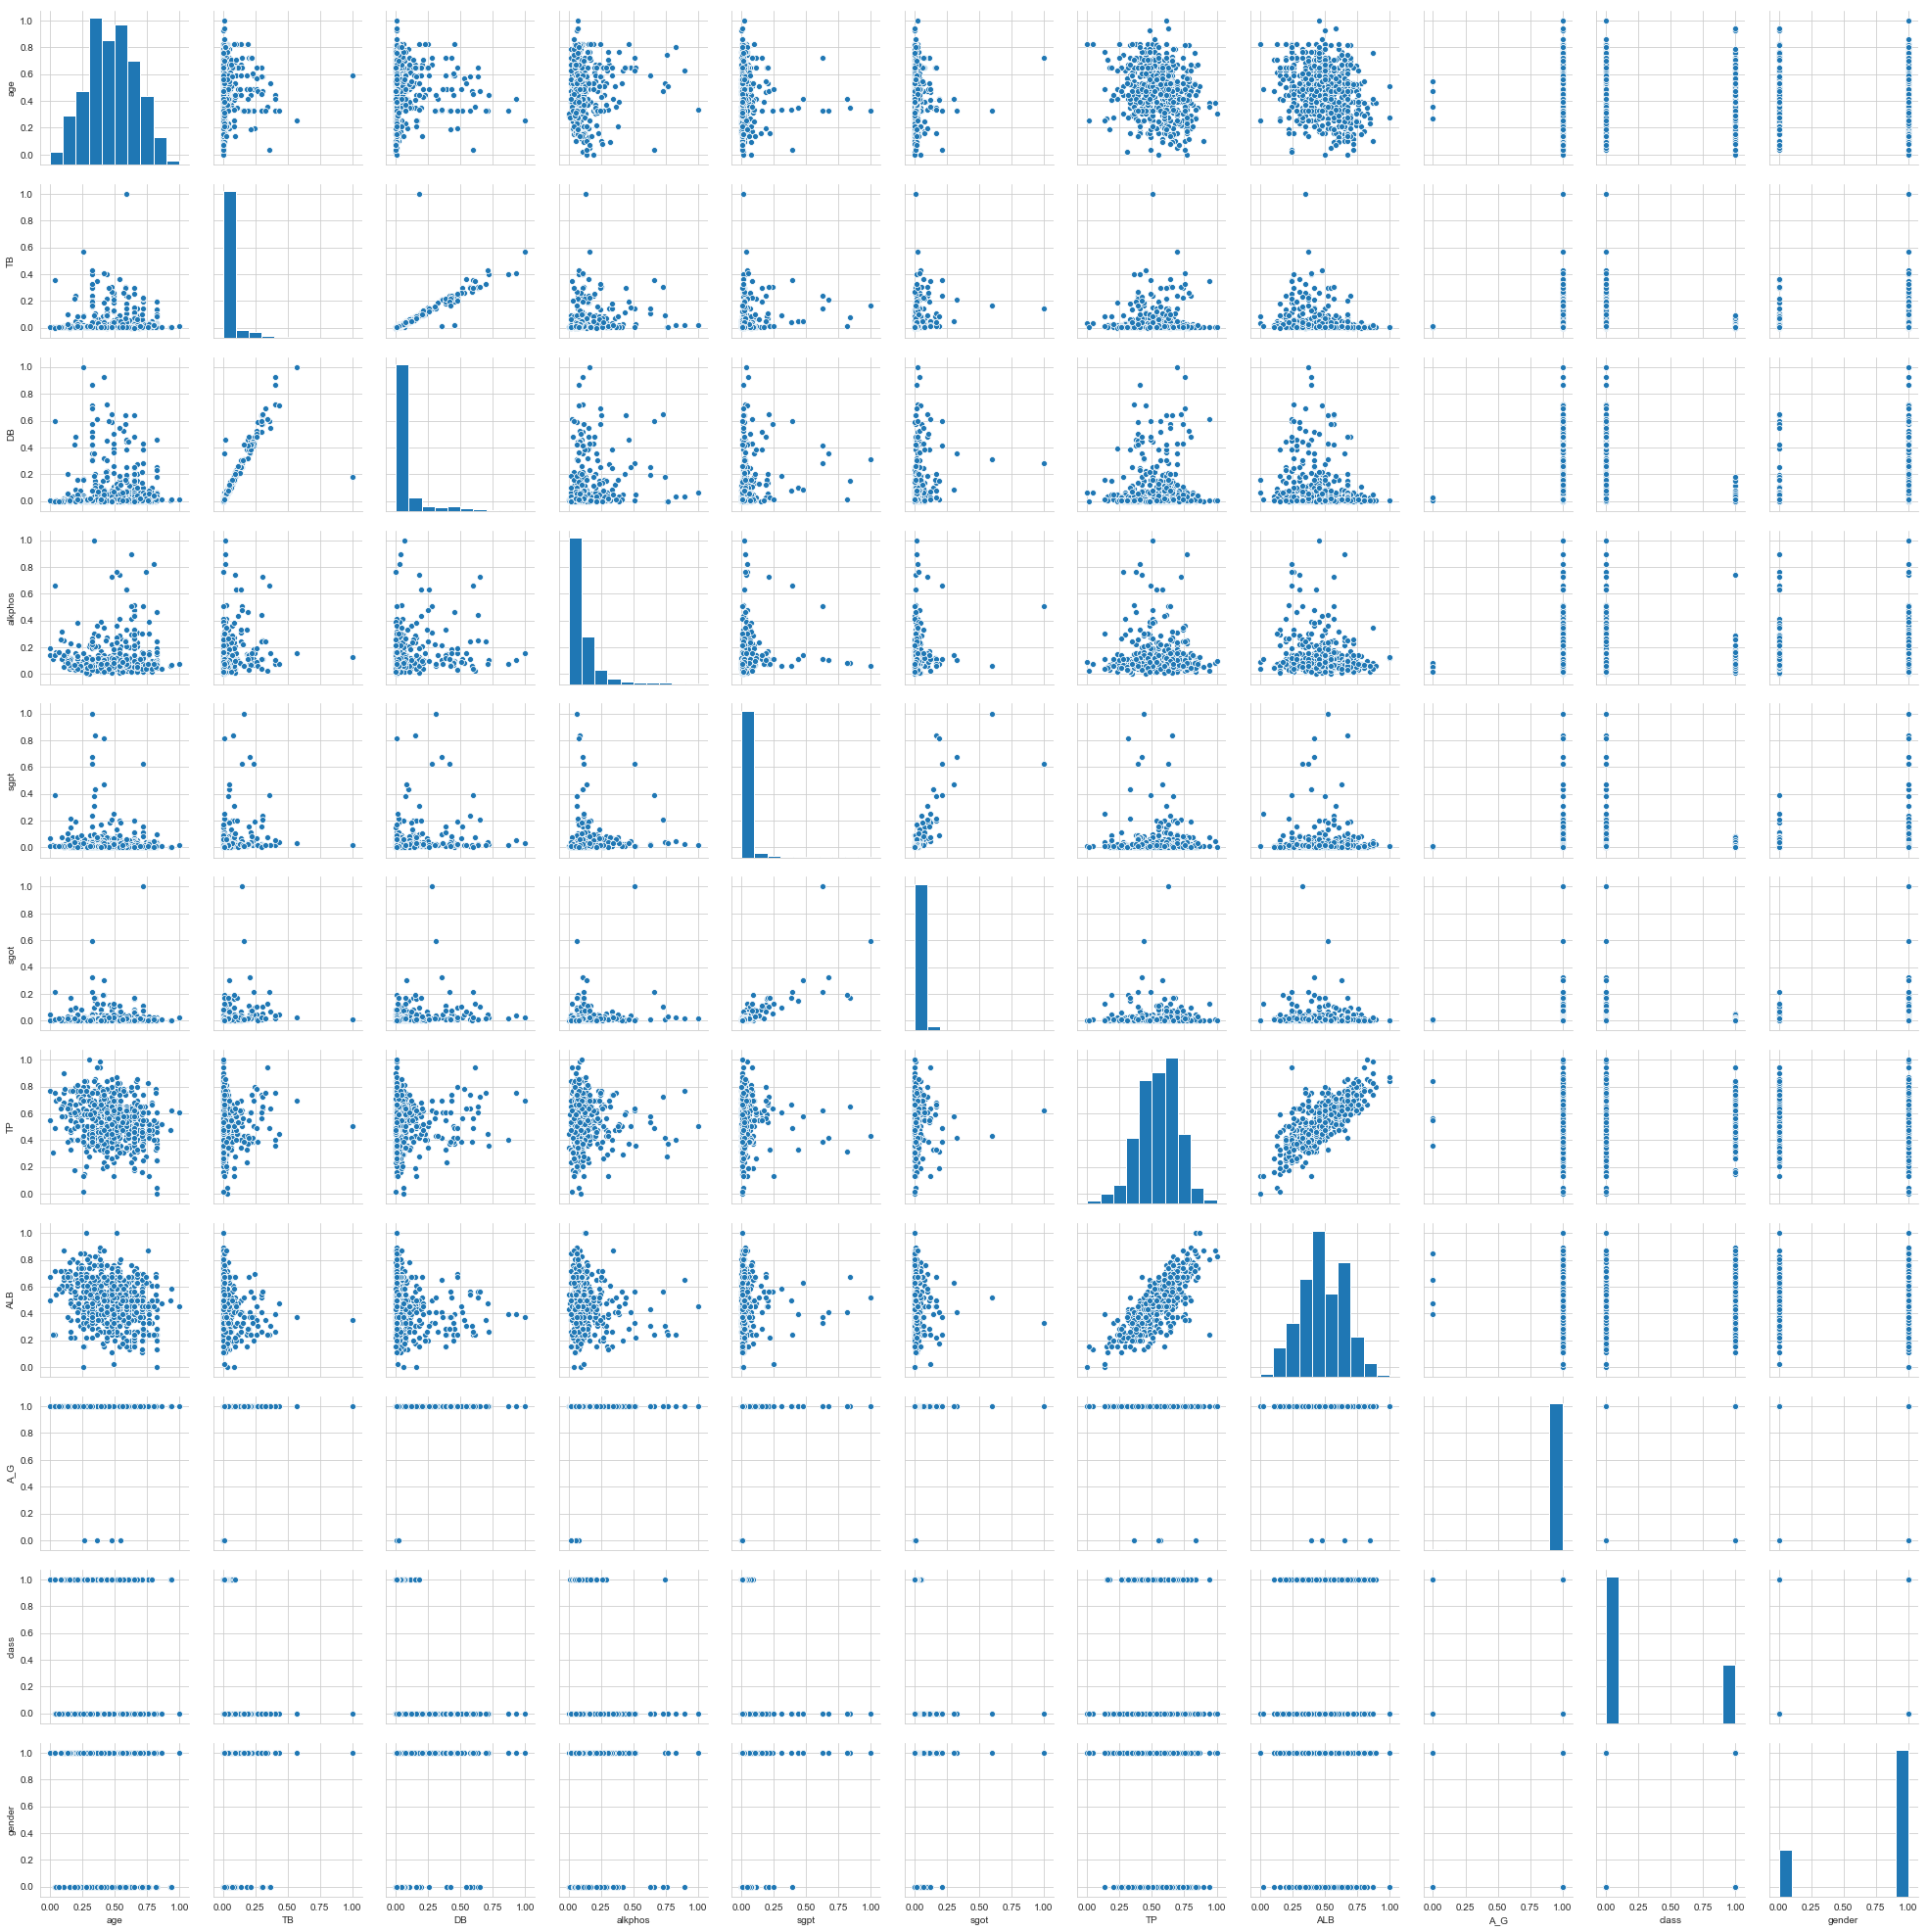

In [30]:
sb.pairplot(norm_liver)

In [31]:

liver_train,liver_test=train_test_split(norm_liver,test_size=0.15,random_state=0)
display(liver_train.shape)
display(liver_test.shape)

(495, 11)

(88, 11)

In [32]:

mod=LogisticRegression()
independent= norm_liver.columns.drop("class")
dependent=["class"]

In [33]:
mod.fit(liver_train[independent],liver_train[dependent])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
print("train accuracy")
display(mod.score(liver_train[independent],liver_train[dependent]))

print("test accuracy")
display(mod.score(liver_test[independent],liver_test[dependent]))

train accuracy


0.7171717171717171

test accuracy


0.6931818181818182

In [35]:
train_prediction=mod.predict(liver_train[independent])
test_prediction=mod.predict(liver_test[independent])
train_conf_matrix=confusion_matrix(liver_train[dependent],train_prediction)
test_conf_matrix=confusion_matrix(liver_test[dependent],test_prediction)

In [36]:
pd.DataFrame(train_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0.0,1.0
0.0,354,1
1.0,139,1


In [37]:
pd.DataFrame(test_conf_matrix,columns=mod.classes_,index=mod.classes_)

,0.0,1.0
0.0,61,0
1.0,27,0


In [38]:

print(classification_report(liver_train[dependent],train_prediction))

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.83       355
         1.0       0.50      0.01      0.01       140

   micro avg       0.72      0.72      0.72       495
   macro avg       0.61      0.50      0.42       495
weighted avg       0.66      0.72      0.60       495



In [39]:

print(classification_report(liver_test[dependent],test_prediction))

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82        61
         1.0       0.00      0.00      0.00        27

   micro avg       0.69      0.69      0.69        88
   macro avg       0.35      0.50      0.41        88
weighted avg       0.48      0.69      0.57        88



In [40]:

model=DecisionTreeClassifier()

In [41]:
model.fit(liver_train[independent],liver_train[dependent])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
model.fit(liver_train[independent],liver_train[dependent])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
print("train accuracy")
display(model.score(liver_train[independent],liver_train[dependent]))

print("test accuracy")
display(model.score(liver_test[independent],liver_test[dependent]))

train accuracy


1.0

test accuracy


0.7159090909090909

In [44]:
model1=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.005)
independent= norm_liver.columns.drop("class")
dependent=["class"]
model1.fit(liver_train[independent],liver_train[dependent])
print("train accuracy")
display(model1.score(liver_train[independent],liver_train[dependent]))

print("test accuracy")
display(model1.score(liver_test[independent],liver_test[dependent]))

train accuracy


0.7636363636363637

test accuracy


0.6363636363636364

In [45]:
model1=DecisionTreeClassifier(min_samples_split=20,min_impurity_decrease=0.1)
independent= norm_liver.columns.drop("class")
dependent=["class"]
model1.fit(liver_train[independent],liver_train[dependent])
print("train accuracy")
display(model1.score(liver_train[independent],liver_train[dependent]))

print("test accuracy")
display(model1.score(liver_test[independent],liver_test[dependent]))

train accuracy


0.7171717171717171

test accuracy


0.6931818181818182

In [46]:
feature=["DB","TB"]

In [47]:
# logistic regression using DB AND TB features

In [48]:
mod.fit(liver_train[feature],liver_train[dependent])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
print("train accuracy")
display(mod.score(liver_train[feature],liver_train[dependent]))

print("test accuracy")
display(mod.score(liver_test[feature],liver_test[dependent]))

train accuracy


0.7171717171717171

test accuracy


0.6931818181818182

In [50]:
#  decision tree using DB AND TB features

In [51]:
model3=DecisionTreeClassifier(min_samples_split=20,min_impurity_decrease=0.1)
feature=["DB","TB"]
dependent=["class"]
model3.fit(liver_train[feature],liver_train[dependent])
print("train accuracy")
display(model3.score(liver_train[feature],liver_train[dependent]))

print("test accuracy")
display(model3.score(liver_test[feature],liver_test[dependent]))

train accuracy


0.7171717171717171

test accuracy


0.6931818181818182

In [52]:
model4=DecisionTreeClassifier(min_samples_split=10,min_impurity_decrease=0.05)
feature=["DB","TB"]
dependent=["class"]
model4.fit(liver_train[feature],liver_train[dependent])
print("train accuracy")
display(model4.score(liver_train[feature],liver_train[dependent]))

print("test accuracy")
display(model4.score(liver_test[feature],liver_test[dependent]))

train accuracy


0.7171717171717171

test accuracy


0.6931818181818182

In [53]:
# k nearest algorithm    only including DB AND TB since they are correlated with class 


kmodel=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
feature=["DB","TB"]
dependent=["class"]
kmodel.fit(liver_train[feature],liver_train[dependent])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [54]:
print("train accuracy")
display(kmodel.score(liver_train[feature],liver_train[dependent]))

print("test accuracy")
display(kmodel.score(liver_test[feature],liver_test[dependent]))

train accuracy


0.6828282828282828

test accuracy


0.7272727272727273

In [55]:
#including all the features into consideration for predicting
k1model=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
independent= norm_liver.columns.drop("class")
dependent=["class"]
k1model.fit(liver_train[independent],liver_train[dependent])
print("train accuracy")
display(k1model.score(liver_train[independent],liver_train[dependent]))

print("test accuracy")
display(k1model.score(liver_test[independent],liver_test[dependent]))

train accuracy


0.8424242424242424

test accuracy


0.6704545454545454

In [56]:
# if we are considering all the features then we are not getting better results compared to selecting only the features DB AND TB

# changing the n_neighbors value to 5 and validating it  

In [57]:
k2model=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
independent= norm_liver.columns.drop("class")
dependent=["class"]
k2model.fit(liver_train[independent],liver_train[dependent])
print("train accuracy")
display(k2model.score(liver_train[independent],liver_train[dependent]))

print("test accuracy")
display(k2model.score(liver_test[independent],liver_test[dependent]))

train accuracy


0.7898989898989899

test accuracy


0.6477272727272727

## changing the n_neighbors to 2 and validating it 

In [58]:
k3model=KNeighborsClassifier(n_neighbors=2,metric="euclidean")
independent= norm_liver.columns.drop("class")
dependent=["class"]
k3model.fit(liver_train[independent],liver_train[dependent])
print("train accuracy")
display(k3model.score(liver_train[independent],liver_train[dependent]))

print("test accuracy")
display(k3model.score(liver_test[independent],liver_test[dependent]))

train accuracy


0.8565656565656565

test accuracy


0.6704545454545454

In [59]:
#from this we can infer that if we increase the n_neighbors value then we are getting better results 

## support vector machine

In [60]:
smodel=SVC(kernel="rbf")
independent= norm_liver.columns.drop("class")
dependent=["class"]
smodel.fit(liver_train[independent],liver_train[dependent])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [61]:
print("train accuracy")
display(smodel.score(liver_train[independent],liver_train[dependent]))

print("test accuracy")
display(smodel.score(liver_test[independent],liver_test[dependent]))

train accuracy


0.7171717171717171

test accuracy


0.6931818181818182